In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
customer_data = pd.read_csv("Mall_Customers.csv")

In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.shape

(200, 5)

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Checking null values

In [8]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
x = customer_data.iloc[:,[3,4]].values
x

Chossing no. of clusters to define
WCSS= Within cluster sum of squares

In [11]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=41)
    kmeans.fit(x)

    wcss.append(kmeans.inertia_)

c:\Users\AmaanM\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\AmaanM\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\AmaanM\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\AmaanM\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

plot an elbow graph to choose no. of cluster

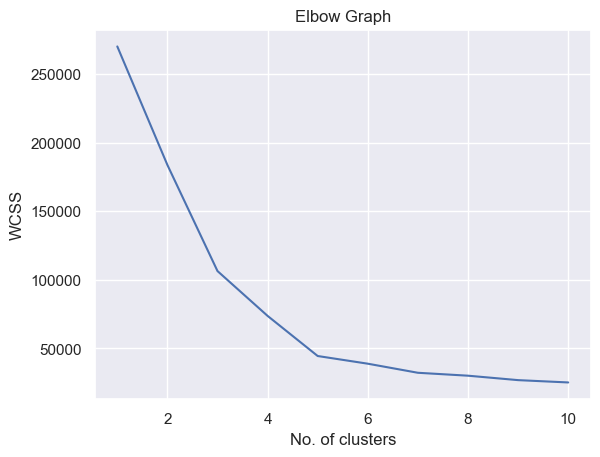

In [12]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

we have two elbow values at 3 and 5, further wcss should be smaller so we are taking clusters = 5

Training the Kmeans clustering model.

In [13]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=41)

#return a label for each datapoint based upon the cluster.

Y = kmeans.fit_predict(x)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


c:\Users\AmaanM\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Visualizing all the clusters and their centroids

5 clusters - 0,1,2,3,4
x[Y==cluster,columnIndex]

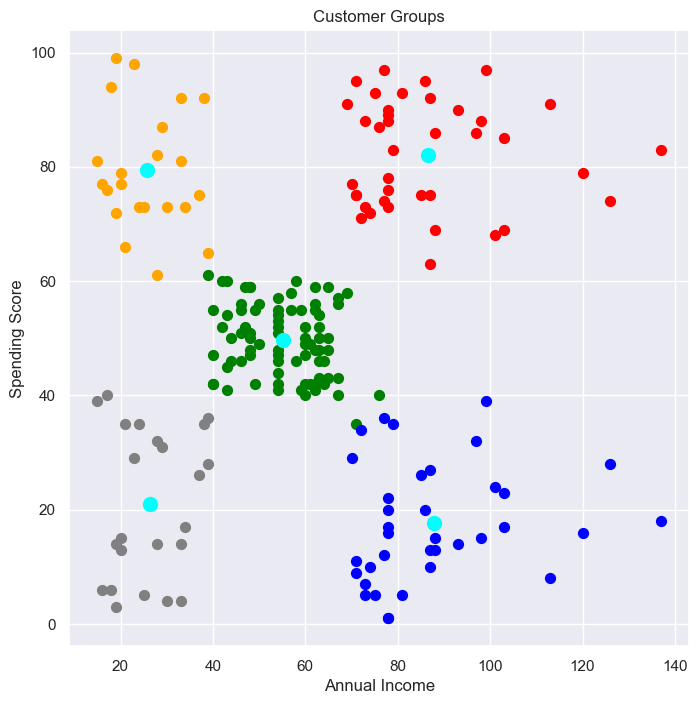

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0],x[Y==0,1], s=50, c= 'green', label = 'Cluster 1')
plt.scatter(x[Y==1,0],x[Y==1,1], s=50, c= 'red', label = 'Cluster 2')
plt.scatter(x[Y==2,0],x[Y==2,1], s=50, c= 'blue', label = 'Cluster 3')
plt.scatter(x[Y==3,0],x[Y==3,1], s=50, c= 'grey', label = 'Cluster 4')
plt.scatter(x[Y==4,0],x[Y==4,1], s=50, c= 'orange', label = 'Cluster 5')

#plot the centroids

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label = 'centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()